In [173]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from nexusformat.nexus import *
from textwrap import wrap
mpl.rcParams['text.usetex'] = True
mpl.rcParams["mathtext.default"] = 'regular'
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
mpl.rcParams['axes.linewidth'] = 3.0

In [18]:
AthEM=nxload('C:/Users/u5522838/Documents/Collaboration Docs/AthEM Nexus Files/fig6+7+8/fig6+7+8/athem_au.nxs')
BTE = nxload('C:/Users/u5522838/Documents/Collaboration Docs/AthEM Nexus Files/fig6+7+8/fig6+7+8/Boltzmann_au.nxs')

In [151]:
BTE_time = BTE.dynamics.time.time_discretization.nxvalue
AthEM_time = AthEM.dynamics.time.time_discretization.nxvalue
BTE_timeindex = min(range(len(BTE_time)), key=lambda i: abs(BTE_time[i]+0.0e-15))
AthEM_timeindex = min(range(len(AthEM_time)), key=lambda i: abs(AthEM_time[i]+0.0e-15))
print(BTE_timeindex)
print(AthEM_timeindex)

1074
750


In [39]:
BTE_FE = BTE.materials.material_0.electrons.band_0.total.offset_energy_static.nxvalue
AthEM_FE = AthEM.materials.material_0.electrons.band_1.total.offset_energy_static.nxvalue

In [192]:
BTE_data=BTE.dynamics.material_0.position_0_0_0.electrons.band_0.total.distribution.distribution.nxvalue
AthEM_eqdata=AthEM.dynamics.material_0.position_0_0_0.electrons.band_0.total.distribution.distribution.nxvalue
AthEM_neqdata=AthEM.dynamics.material_0.position_0_0_0.electrons.band_1.total.distribution.distribution.nxvalue
AthEM_data=AthEM.postprocessing.total_distribution.distribution.nxvalue

Electron-Electron Scattering distribution 

In [193]:
BTE_energy = BTE.dynamics.material_0.position_0_0_0.electrons.band_0.total.distribution.energy.nxvalue+BTE_FE
BTE_dis0fs=BTE_data[BTE_timeindex,:]


AthEM_energy = AthEM.dynamics.material_0.position_0_0_0.electrons.band_0.total.distribution.energy.nxvalue+AthEM_FE
AthEM_dis = AthEM_data[AthEM_timeindex,:]

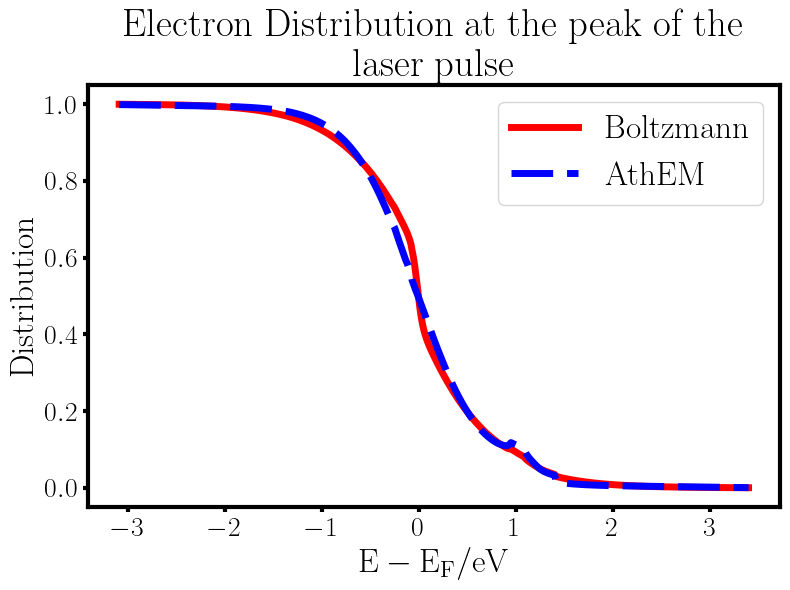

In [194]:
fig,ax=plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
ax.plot(BTE_energy[200:-100],BTE_dis0fs[200:-100],label='Boltzmann',linewidth=5,color='red')
ax.plot(AthEM_energy[200:-100],AthEM_dis[200:-100],label='AthEM',linewidth=5,color='blue',dashes=[6,2])
ax.set_xlabel(r'$\mathrm{E-E_F / eV}$',fontsize=24)
ax.set_ylabel('Distribution',fontsize=24)
ax.set_title("\n".join(wrap('Electron Distribution at the peak of the laser pulse',40)),fontsize=28,fontweight='bold')
ax.tick_params(axis='both',which='major',labelsize=20,width=3)
ax.legend(prop={'size': 24})
plt.tight_layout()
plt.savefig('eescatter_dis.pdf',dpi=2000)
plt.show()

Non-Eq electron distribution

In [168]:
def FermiDirac(egrid,cp,T):
    k = 8.617e-5
    return 1/(np.exp((egrid-cp)/(k*T))+1)

In [237]:
BTE_cp = BTE.dynamics.material_0.position_0_0_0.electrons.band_0.total.abs_chemical_potential.abs_chemical_potential.nxvalue[BTE_timeindex]
BTE_T = BTE.dynamics.material_0.position_0_0_0.electrons.band_0.total.temperature.temperature.nxvalue[BTE_timeindex]
BTE_neqdis=BTE_data[BTE_timeindex,:] - FermiDirac(BTE_energy,BTE_cp,BTE_T)

AthEM_cp = AthEM.dynamics.material_0.position_0_0_0.electrons.band_0.total.abs_chemical_potential.abs_chemical_potential.nxvalue[AthEM_timeindex]
AthEM_T = AthEM.postprocessing.temperature.temperature.nxvalue[AthEM_timeindex]
AthEM_neqdis=AthEM_data[AthEM_timeindex,:] - FermiDirac(AthEM_energy,AthEM_cp,AthEM_T)

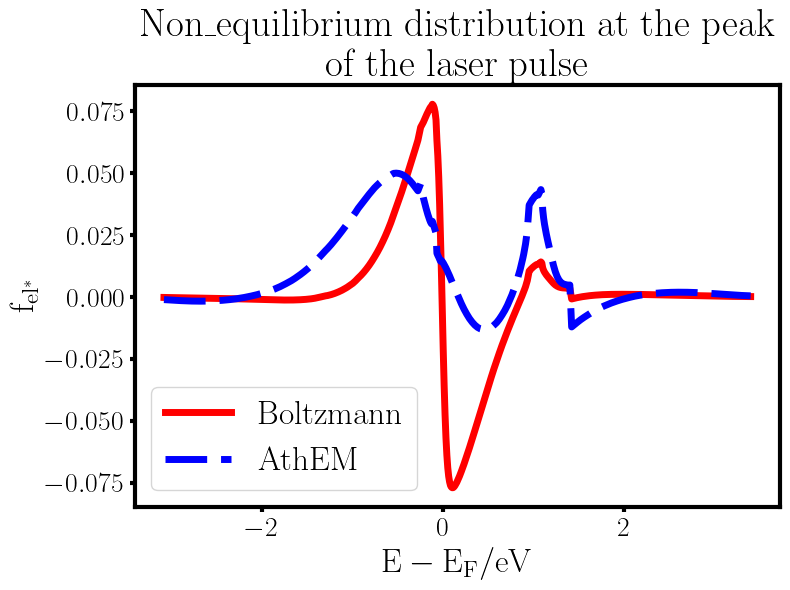

In [291]:
fig,ax=plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
ax.plot(BTE_energy[200:-100],BTE_neqdis[200:-100],label='Boltzmann',linewidth=5,color='red')
ax.plot(AthEM_energy[200:-100],AthEM_neqdis[200:-100],label='AthEM',linewidth=5,color='blue',dashes=[6,2])
ax.set_xlabel(r'$\mathrm{E-E_F / eV}$',fontsize=24)
ax.set_ylabel(r'$\mathrm{f_{el^*}}$',fontsize=24)
ax.set_title("\n".join(wrap('Non_equilibrium distribution at the peak of the laser pulse',40)),fontsize=28,fontweight='bold')
ax.tick_params(axis='both',which='major',labelsize=20,width=3)
ax.legend(prop={'size': 24})
plt.tight_layout()
plt.savefig('neqeescatter_dis.pdf',dpi=2000)
plt.show()

In [239]:
AthEM_DOS = AthEM.materials.material_0.electrons.band_0.total.DOS.dos.nxvalue
BTE_DOS = BTE.materials.material_0.electrons.band_0.total.DOS.dos.nxvalue

AthEM_cp = AthEM.dynamics.material_0.position_0_0_0.electrons.band_0.total.abs_chemical_potential.abs_chemical_potential.nxvalue[AthEM_timeindex]
AthEM_T = AthEM.dynamics.material_0.position_0_0_0.electrons.band_0.total.temperature.temperature.nxvalue[AthEM_timeindex]
AthEM_ehpdis=AthEM_data[AthEM_timeindex,:] - FermiDirac(AthEM_energy,AthEM_cp,AthEM_T)

AthEM_ehp = AthEM_DOS*AthEM_ehpdis
BTE_ehp = BTE_DOS*BTE_neqdis

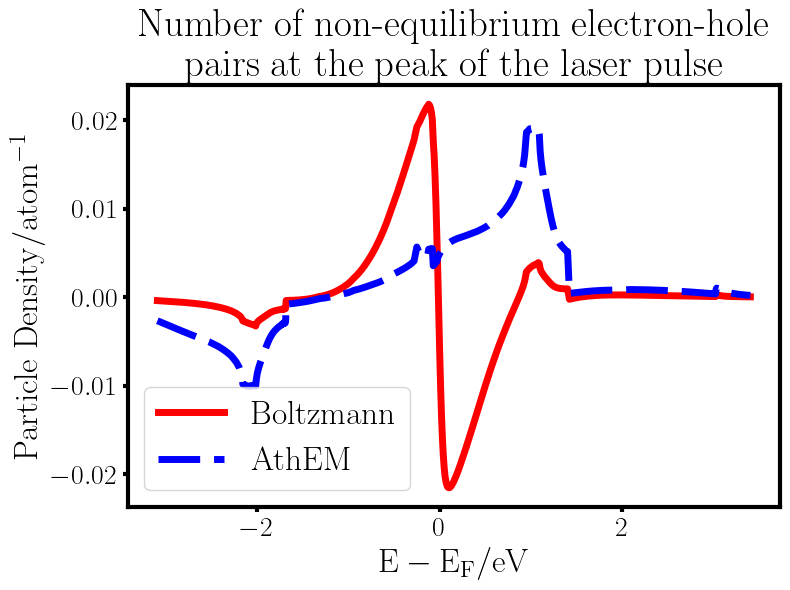

In [240]:
fig,ax=plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
ax.plot(BTE_energy[200:-100],BTE_ehp[200:-100],label='Boltzmann',linewidth=5,color='red')
ax.plot(AthEM_energy[200:-100],AthEM_ehp[200:-100],label='AthEM',linewidth=5,color='blue',dashes=[6,2])
ax.set_xlabel(r'$\mathrm{E-E_F / eV}$',fontsize=24)
ax.set_ylabel(r'$\mathrm{Particle \ Density / atom^{-1}}$',fontsize=24)
ax.set_title("\n".join(wrap('Number of non-equilibrium electron-hole pairs at the peak of the laser pulse',40)),fontsize=28,fontweight='bold')
ax.tick_params(axis='both',which='major',labelsize=20,width=3)
ax.legend(prop={'size': 24})
plt.tight_layout()
plt.savefig('ehp_dis.pdf',dpi=2000)
plt.show()

In [279]:
AthEM_eph=nxload('C:/Users/u5522838/Documents/Collaboration Docs/AthEM Nexus Files/fig11/fig11/athem.nxs')
BTE_eph = nxload('C:/Users/u5522838/Documents/Collaboration Docs/AthEM Nexus Files/fig11/fig11/Boltzmann_new.nxs')

In [286]:
BTE_eph_time = BTE_eph.dynamics.time.time_discretization.nxvalue*1e15
AthEM_eph_time = AthEM_eph.dynamics.time.time_discretization.nxvalue*1e15

BTE_eph_temp = BTE_eph.dynamics.material_0.position_0_0_0.electrons.band_0.total.temperature.temperature.nxvalue
AthEM_eph_temp = AthEM_eph.dynamics.material_0.position_0_0_0.electrons.band_0.total.temperature.temperature.nxvalue

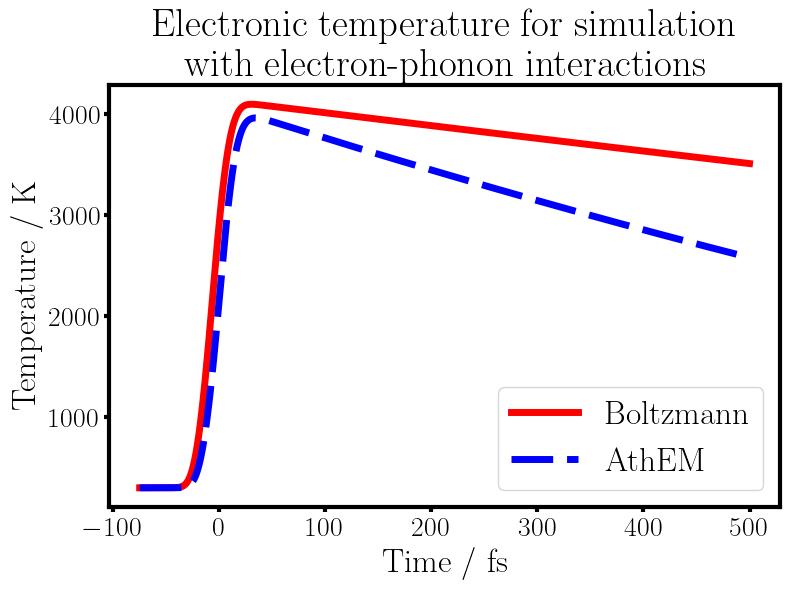

In [287]:
fig,ax=plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
ax.plot(BTE_eph_time,BTE_eph_temp,label='Boltzmann',linewidth=5,color='red')
ax.plot(AthEM_eph_time,AthEM_eph_temp,label='AthEM',linewidth=5,color='blue',dashes=[6,2])
ax.set_xlabel('Time / fs',fontsize=24)
ax.set_ylabel('Temperature / K',fontsize=24)
ax.set_title("\n".join(wrap('Electronic temperature for simulation with electron-phonon interactions',40)),fontsize=28,fontweight='bold')
ax.tick_params(axis='both',which='major',labelsize=20,width=3)
ax.legend(prop={'size': 24})
plt.tight_layout()
plt.savefig('temps.pdf',dpi=2000)
plt.show()

In [264]:
l=np.loadtxt(open("../SurfaceDOS.csv","rb"),delimiter=" ")


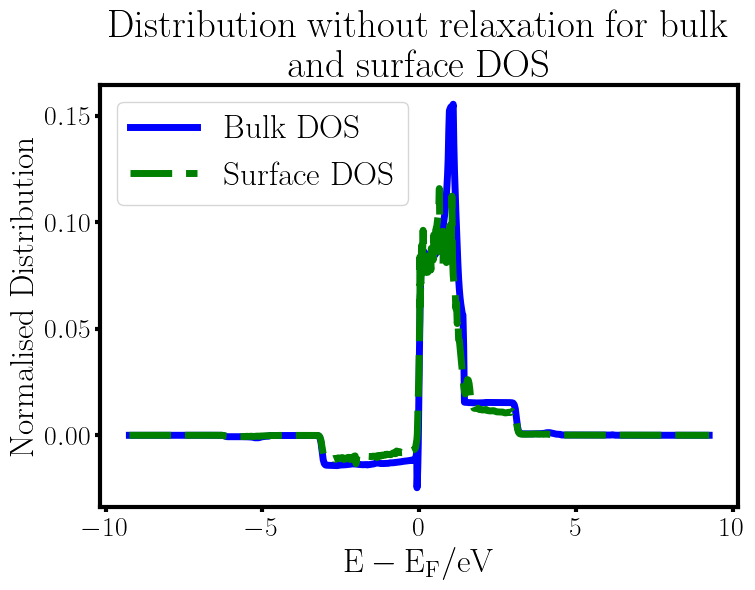

In [288]:
fig,ax=plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
ax.plot(l[:,0],l[:,1],label='Bulk DOS',linewidth=5,color='blue')
ax.plot(l[:,0],l[:,2],label='Surface DOS',linewidth=5,color='green',dashes=[6,2])
ax.set_xlabel(r'$\mathrm{E-E_F / eV}$',fontsize=24)
ax.set_ylabel('Normalised Distribution',fontsize=24)
ax.set_title("\n".join(wrap('Distribution without relaxation for bulk and surface DOS',40)),fontsize=28,fontweight='bold')
ax.tick_params(axis='both',which='major',labelsize=20,width=3)
ax.legend(prop={'size': 24},loc='upper left')
plt.tight_layout()
plt.savefig('SurfaceDOS.pdf',dpi=2000)
plt.show()